<a href="https://colab.research.google.com/github/biruk-tafese/MachineLearingIntern/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('crop_recommendation.csv')
data

In [5]:
#putting feature variable to X

X = data.drop("label", axis=1)

#putting response variable to y

y = data['label']

In [ ]:
#now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

X_train.shape ,X_test.shape

In [14]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [16]:
%%time
classifier_rf.fit(X_train, y_train)
# checking the oob score
classifier_rf.oob_score_


CPU times: user 508 ms, sys: 20.5 ms, total: 529 ms
Wall time: 416 ms


0.9707792207792207

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Let’s do hyperparameter tuning for Random Forest using
# GridSearchCV and fit the data

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

#instantiate the grid search model

gride_search = GridSearchCV(estimator=rf, param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")



In [25]:
%%time
gride_search.fit(X_train,y_train)
rf_best = gride_search.best_estimator_
gride_search.best_score_

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 3.69 s, sys: 383 ms, total: 4.07 s
Wall time: 2min 57s


0.9941558441558442

IndexError: ignored

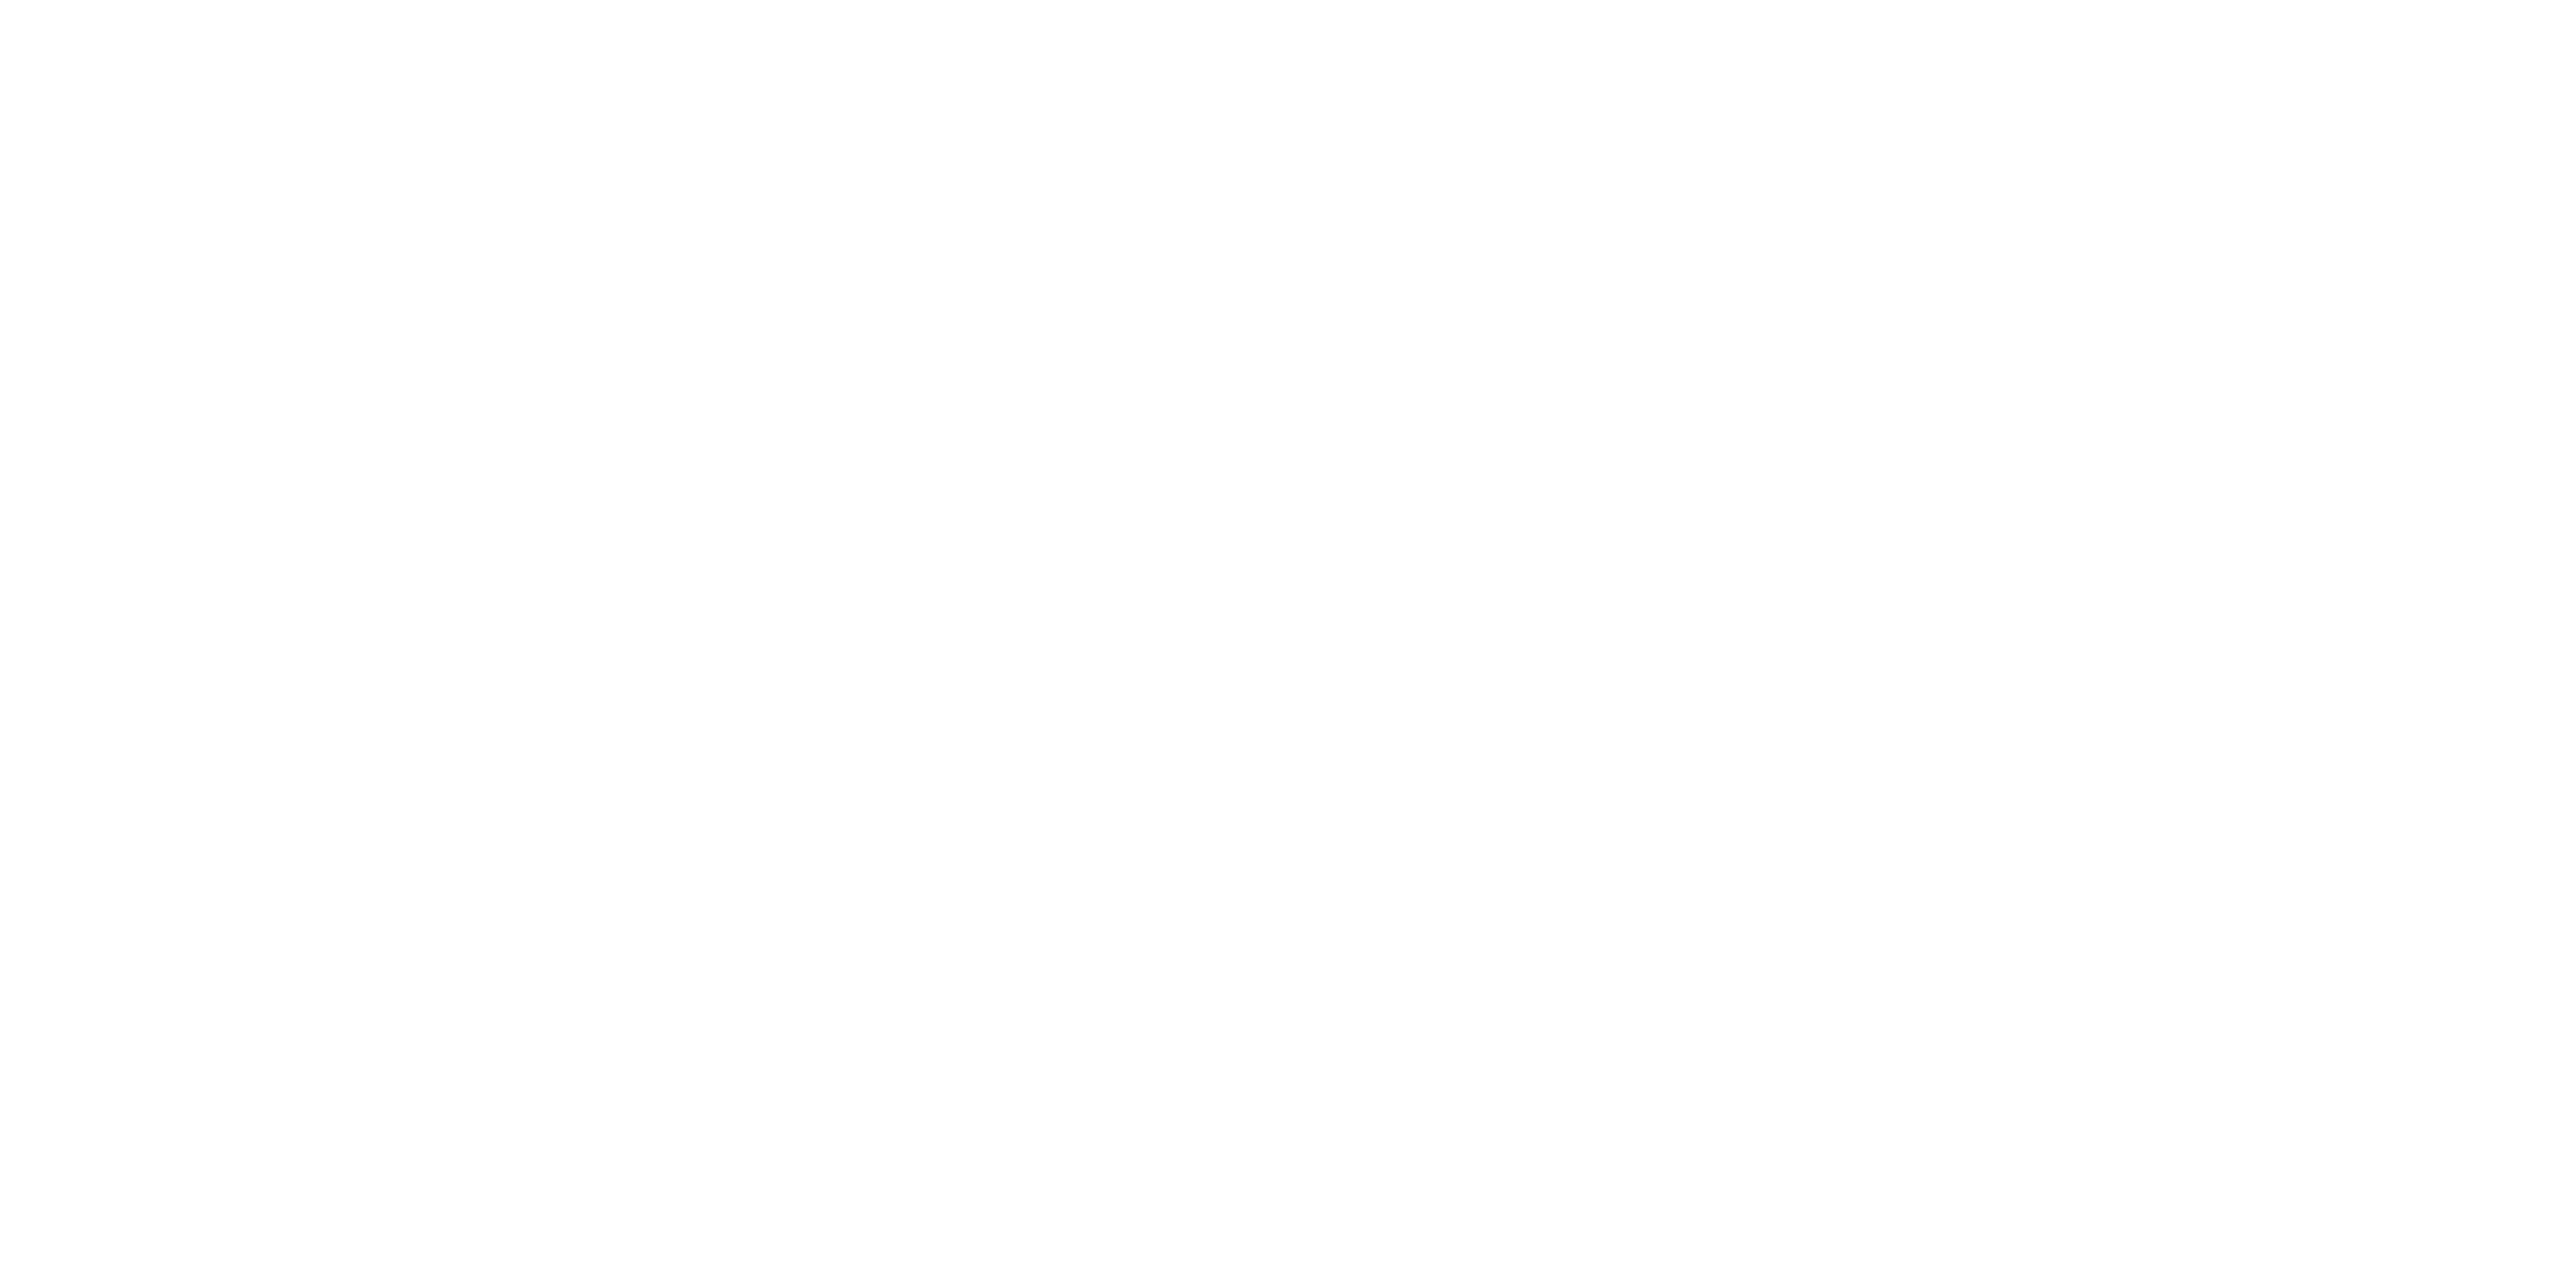

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names = X.columns,class_names=['label'],filled=True)